In [ ]:
1.	Szukanie minimum metodą monte carlo
Minimum za pomocą tej metody szukamy typowo na oślep, tj. wyznaczamy punkt początkowy, liczymy wartość funkcji w tym punkcie, a następnie w pętli losujemy nowe punkty. Losując zupełnie nowe wartości x1 (niezależne od x0) mamy znacznie większe prawdopodobieństwo, że trafimy na minimum globalne.

Algorytm:
Losuj x0
Wylicz f0 = f(x0)
Dopóki nie przekroczyliśmy maksymalnej liczby iteracji:
Losuj x1 (można wylosować nową wartość lub np. dodać wylosowaną wartość do x0)
Wylicz f1 = f(x1)
Jeżeli f1 jest lepszym wynikiem niż f0:
x0 = x1
f0 = f1


Minimum znalezione dla f(x) = x^2 - 5 * sin(2x):
x = 0.7133917745516953
f(x) = -4.439312525047744


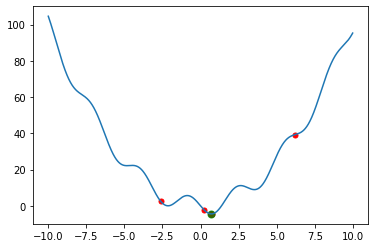

In [4]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

points = []

def monte_carlo(f, max_iterations):
  # Losujemy punkt początkowy
  x0 = random.uniform(-10, 10)
  # Obliczamy wartość funkcji w tym punkcie
  f0 = f(x0)

  points.append((x0, f0))

  for i in range(max_iterations):
    x1 = random.uniform(-10, 10) # Losujemy nowy punkt
    f1 = f(x1) # Obliczamy wartość funkcji w nowym punkcie
    if f1 < f0: # Jeżeli wartość funkcji w nowym punkcie jest lepsza niż w poprzednim
        x0 = x1 # Aktualizujemy punkt początkowy
        f0 = f1 # Oraz wartość funkcji w tym punkcie
        points.append((x0, f0))
  return x0, f0

def f(x):
  return x**2 - 5 * math.sin(2*x)


min_x, min_f = monte_carlo(f, 10000)
print("Minimum znalezione dla f(x) = x^2 - 5 * sin(2x):")
print("x =", min_x)
print("f(x) =", min_f)

x = np.arange(-10, 10, 0.01)
y = [f(i) for i in x]
plt.plot(x, y)

x_p, y_p = zip(*points)
plt.scatter(x_p, y_p, color="red", s=25)
plt.scatter(min_x, min_f, color="green", s=50, alpha=0.75)
plt.show()

2.	Szukanie minimum metodą gradientową
W przypadku tego algorytmu mamy kierunek poszukiwania minimum dzięki liczeniu pochodnej. Będzie działał znacznie szybciej niż poprzedni. Minusem tego algorytmu jest fakt, iż zatrzymamy się w minimum lokalnym.
Do obliczania pochodnej przyda się biblioteka sympy:
 
Funkcja oraz pochodna:


Określ learning_rate (mały), max_iteracja, wymagana_precyzja wyniku (bardzo mała)
Wylosuj punkt początkowy obecny_x
Określ obecną_precyzję (dowolnie dużą, precyzja będzie nadpisywana w pętli)
Dopóki obecna_precyzja jest większa od wymaganej_precyzji i nie przekroczyliśmy max_iteracji:
	stary_x = obecny_x
obecny_x = obecny_x - learning_rate * f_prim(stary_x)
obecna_precyzja = |obecny_x – stary_x|
iteracja ++
Wynik znajduje się w obecny_x


Minimum znajduje się w x = 1.999951
Minimum znaleziono w iteracji 594


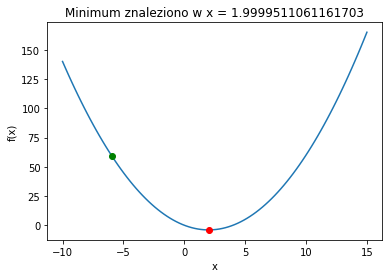

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *

# Zdefiniuj funkcje f(x) = x^2 - 4*x
def f(x):
  return x**2 - 4*xD

# Zdefiniuj funkcję f_prim(x), która oblicza pochodną f(x)
def f_prim(x):
  x_symbol = Symbol('x')
  y_prim = f(x_symbol).diff(x_symbol)
  return eval(str(y_prim))

# Ustaw współczynnik uczenia i maksymalną liczbę iteracji.
learning_rate = 0.01  
max_iteracja = 1000  

# Ustalenie zakresu możliwych punktów początkowych i wymaganej precyzji
start_range = (-10, 15)
wymagana_precyzja = 1e-6  

# Wybierz losowo punkt początkowy i zainicjuj precyzję i licznik iteracji
obecny_x = random.uniform(start_range[0], start_range[1])
start = obecny_x;
obecna_precyzja = float("inf")  
iteracja = 0 

# Użyj zejścia gradientowego, aby znaleźć minimum f(x)
while obecna_precyzja > wymagana_precyzja and iteracja < max_iteracja:
  stary_x = obecny_x
  obecny_x = obecny_x - learning_rate * f_prim(stary_x)
  obecna_precyzja = abs(obecny_x - stary_x)
  iteracja += 1

 #Wypisz minimalną wartość x i liczbę iteracji
print(f"Minimum znajduje się w x = {obecny_x:.6f}")
print(f"Minimum znaleziono w iteracji {iteracja}")

# Utwórz tablicę punktów dla osi x
x = np.linspace(start_range[0], start_range[1], 100)

# Wykres funkcji z wykorzystaniem punktów w tablicy x
plt.plot(x, f(x))

# Wyznacz punkt początkowy i minimum za pomocą czerwonych punktów
plt.plot([start], [f(start)], 'g--o')
plt.plot([obecny_x], [f(obecny_x)], 'r--o')

# Dodaj etykiety i tytuł do wykresu
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimum znaleziono w x = ' + str(obecny_x))

plt.show()

3.	Szukanie minimum metodą symulowanego wyżarzania
Algorytm ten działa na podobnej zasadzie co monte carlo, natomiast podczas podejmowania decyzji o przypisaniu nowej wartości do starej bierze pod uwagę również gorsze rozwiązania bazując na prawdopodobieństwie – ma to na celu próbę wyjścia z minimum lokalnego.


Algorytm
Określ punkt początkowy x0
Określ początkową temperaturę T
Określ mnożnik temperatury C (bliski 1, np. 0.999)
Oblicz f0 = f(x0)
Dopóki T jest większe od 1:
Losuj nowy punkt x1 = x0 + (mała wartość od -1 do 1)
Oblicz f1 = f(x1)
Oblicz prawdopodobieństwo P = np.exp(-(f1-f0)/T)
Jeżeli f1 jest mniejszy od f0 lub P jest większe od random(0,1):
x0 = x1
f0 = f1
T = T * C


0.7343866895995831 -4.434677048689309


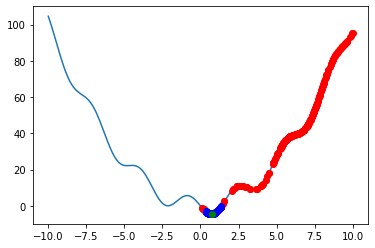

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Tworzymy tablicę x_history przechowującą wszystkie punkty wyżarzania wraz z temperaturą
x_history = []

def symulowane_wyzarzanie(f, x0, T, C, max_iter):
    x = x0
    fx = f(x)
    for i in range(max_iter):
        x_history.append([x, T])
        x1 = x + (np.random.rand() - 0.5)
        fx1 = f(x1)
        if fx1 < fx or np.exp(-(fx1 - fx) / T) > np.random.rand():
            x = x1
            fx = fx1
        T *= C
    return x, fx

# Przykładowa funkcja
def f(x):
  return x**2 - 5 * math.sin(2*x)

x0 = 10 # Punkt początkowy
T = 100 # Początkowa temperatura
C = 0.99 # Mnożnik temperatury
max_iter = 1000 # Maksymalna liczba iteracji

x, fx = symulowane_wyzarzanie(f, x0, T, C, max_iter)
print(x, fx)

# Tworzymy wektor X zawierający wartości od -10 do 10 z krokiem 0.1
X = np.arange(-10, 10, 0.1)

# Rysujemy wykres funkcji f
Y = [f(i) for i in X]
plt.plot(X, Y)

for i in range(len(x_history)):
  if x_history[i][1] > 2:
    plt.plot(x_history[i][0], f(x_history[i][0]), "ro")
  else:
    plt.plot(x_history[i][0], f(x_history[i][0]), "bo")

# Oznaczamy na wykresie minimum znalezione przez algorytm
plt.plot(x, fx, "go")

# Wyświetlamy wykres
plt.show()